# Modelo directo de evaporación


## Modelo
Este modelo determina la velocidad de vaporización de un charco, con el modelo de Tanque de evaporación Kawamura y MacKay(1987).


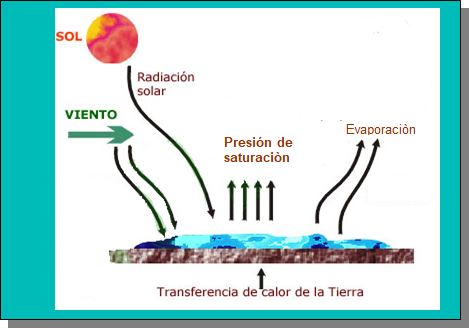

## Variables
|Variable|Significado|Unidades|
|------|------|------|
|m'|		Masa en el charco	||		
|Cp	|	Capacidad Calorifica||			
|t|		tiempo||			
|H|		Flux de calor en el charco	||		
|Rg|		Constante de los gases	|		Pa m^3/kgmol K|
|dp|		Diámetro del charco	|		m|
|M	|	Peso molecular		|kg/kgmol|
|Hv		|Calor de vaporización 		|	J/mol|
|Psat|		Presión de vapor a temperatura ambiente		|	Pa|
|$\nu$|		Viscosidad cinemática		|	m^2/s|
|D|		Difusividad en aire		|	m^2/s|
|Qsol|		Radiación solar	|	J/m^2 s|
|hl|		  Coef. de transferencia de calor (líquido)		|	J/m^2 s K|
|hgrd|		  Coef. de transferencia de calor (suelo)	|	J/m^2 s K|
|T	|	Temperatura ambiente		|	K|
|u|		Velocidad del viento		|	m/s|


## Variables a calcular


|Variable|Significado|Unidades|
|------|------|------|
|Nsc|		Número de Schmidt||			
|b|		Parámetro en función de Psat	||		
|Ugr|		Coef. global de transferencia de calor			|J m^2 s K|
|kg	|	Coeficiente de transferencia de Masa|			m/s|
|A|		Área del charco			|m^2|
|mm|		             Velocidad de vap. por transferencia de masa|			kg/s|
|msol|		Velocidad de vap. por radiación solar|			kg/s|


### Incógnitas
|Variable|Significado|Unidades|
|------|------|------|
|mt	|Velocidad de vaporación	|kg/s|


### Consideraciones
- El modelo es aplicable tanto para líquidos volátiles como para no volátiles.
- El modelo está basado en balances de calor en estado estacionario alrededor del charco incluyendo la radiación solar, enfriamiento por evaporación y la transferencia de calor del suelo.
- El resultado tiene una desviación de hasta el 20%, pero en algunos casos se ha tenido un 40%.









## Desarrollo y ecuaciones

#### Balance total de energía en un charco

- Ecuación 1.  $m´Cp\frac{dT}{dt} =H- Lm$


#### Velocidad de Evaporación

Para líquidos la transferencia de masa por evaporación es el mecanismo limitante:

- Ecuación 2. $m_{masa}=\frac{MK_gAP_{sat}}{R_gT}$

#### Coeficiente de transferencia de masa


- Ecuación 3.  $k_g=0.004N_{SC}^{-0.67}V^{0.78}dp^{-0.11}$


- Ecuación 4. $N_{SC}=\frac{\nu}{D}$


Además se tiene la velocidad de vaporización debido a la radiación solar:

- Ecuación 5. $m_{sol}=\frac{Q{sol}MA}{Hv}$

Combinando las ecuaciones 3 y 4:


- Ecuación 6.$m_{tot}=m_{sol}(\frac{1}{1+\beta})+m_{m}(\frac{1}{1+\beta})$

Donde b es función de la Psat y está dado por:
- Ecuación 7. $\beta=[(3650)N^{0.67}_{sc}+\frac{Ug_rR_gT}{kg}]\frac{R_gT^2}{P_{sat}Hv^2}$

Con:

- Ecuación 8. $Ugr=\frac{1}{hl}+\frac{1}{hsr}$

## Resultados


In [1]:
#Datos
Rg=8314
dp=10
M=72
Hv=27400
Psat=65225
nu=0.000015
D=0.0000071
Qsol=642
hl=43.1
hgrd=45.3
T=296
u=4.9

Se calcula el área del charco

In [2]:
import numpy as np
import math
A=np.pi*dp**2/4
print("A= "+ str(round(A,3))+"m^2")

A= 78.54m^2


#### Coeficiente de transferencia de masa

In [8]:
Nsc=nu/D
kg=0.00482*Nsc**-0.67*u**0.78*dp**-0.11
print("Nsc= "+ str(round(Nsc,2)))
print("Kg= "+ str(round(kg,4))+" m/s")

Nsc= 2.11
Kg= 0.0078 m/s


#### Coeficiente total de transferencia de calor:

In [10]:
Ugr=1/((1/hl)+(1/hgrd))
print("Ugr= "+ str(round(Ugr,2))+" J/m^2 s K")

Ugr= 22.09 J/m^2 s K


#### Velocidad de evaporación debido a los efectos de transferencia de masa:

In [13]:
mm=kg*A*M*Psat/(Rg*T)
print("mm= "+ str(round(mm,2))+" kg/s")

mm= 1.17 kg/s


#### Velocidad de evaporación debido a la radiación solar:


In [14]:
msol=Qsol*M*A/Hv/1000
print("msol= "+ str(round(msol,3))+" kg/s")

msol= 0.132 kg/s


#### Cálculo del parámetro $\beta$

In [15]:
beta=(3650000*(Nsc**0.67)+(Ugr*Rg/1000*T)/kg)*(Rg/1000*T**2)/(Psat*Hv**2)
print("beta= "+ str(round(beta,3)))

beta= 0.193


#### Velocidad de vaporización neta:

In [16]:
m=msol*(1/(1+beta))+mm*(beta/(1+beta))
print("m= "+ str(round(m,3))+" Kg/s")


m= 0.301 Kg/s
